https://www.kaggle.com/datasets/galaxyh/kdd-cup-1999-data?resource=download

KDD Cup 1999 dataset

In [1]:
columns = ['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'target']

In [33]:
#Importing all the required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, multilabel_confusion_matrix, classification_report
import datetime as dt

In [3]:
df = pd.read_csv('kddcup.data.gz', names=columns)

In [4]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898431 entries, 0 to 4898430
Data columns (total 42 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   duration                     int64  
 1   protocol_type                object 
 2   service                      object 
 3   flag                         object 
 4   src_bytes                    int64  
 5   dst_bytes                    int64  
 6   land                         int64  
 7   wrong_fragment               int64  
 8   urgent                       int64  
 9   hot                          int64  
 10  num_failed_logins            int64  
 11  logged_in                    int64  
 12  num_compromised              int64  
 13  root_shell                   int64  
 14  su_attempted                 int64  
 15  num_root                     int64  
 16  num_file_creations           int64  
 17  num_shells                   int64  
 18  num_access_files             int64  
 19  

In [6]:
len(df)

4898431

In [7]:
def remove_dupplicates(df):
    # Dropping the duplicates
    recordcount = len(df)
    print ("Original number of records in the training dataset before removing duplicates is: " , recordcount)
    df.drop_duplicates(subset=None, inplace=True)  # Python command to drop duplicates
    newrecordcount = len(df)
    print ("Number of records in the training dataset after removing the duplicates is :", newrecordcount,"\n")

In [8]:
remove_dupplicates(df)

Original number of records in the training dataset before removing duplicates is:  4898431
Number of records in the training dataset after removing the duplicates is : 1074992 



In [9]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [10]:
df.target.value_counts()

target
normal.             812814
neptune.            242149
satan.                5019
ipsweep.              3723
portsweep.            3564
smurf.                3007
nmap.                 1554
back.                  968
teardrop.              918
warezclient.           893
pod.                   206
guess_passwd.           53
buffer_overflow.        30
warezmaster.            20
land.                   19
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64

In [11]:
# remove if attack number is lower than 1500
new_df = df[df['target'].map(df['target'].value_counts()) > 1500]

In [12]:
new_df.target.value_counts()

target
normal.       812814
neptune.      242149
satan.          5019
ipsweep.        3723
portsweep.      3564
smurf.          3007
nmap.           1554
Name: count, dtype: int64

In [13]:
b = new_df.target.unique()
print(b)
print(new_df['target'].value_counts())

start = dt.datetime.now()
encoder = preprocessing.LabelEncoder()
new_df.loc[:, 'target'] = encoder.fit_transform(new_df['target'])
attacks = new_df.target.unique()
print(attacks)
print(new_df['target'].value_counts())
end = dt.datetime.now()-start
print('time taken:',end)

['normal.' 'neptune.' 'smurf.' 'portsweep.' 'ipsweep.' 'satan.' 'nmap.']
target
normal.       812814
neptune.      242149
satan.          5019
ipsweep.        3723
portsweep.      3564
smurf.          3007
nmap.           1554
Name: count, dtype: int64
[3 1 6 4 0 5 2]
target
3    812814
1    242149
5      5019
0      3723
4      3564
6      3007
2      1554
Name: count, dtype: int64
time taken: 0:00:00.157998


In [14]:
X = new_df.drop('target', axis=1)
y = new_df.target

In [15]:
X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0


In [16]:
def remove_object(df):
    start = dt.datetime.now()
    encoder = preprocessing.LabelEncoder()
    object_columns = df.select_dtypes(include=['object']).columns
    
    df[object_columns] = df[object_columns].apply(lambda col:encoder.fit_transform(col.astype(str)))
    
    end = dt.datetime.now()-start
    print('Encoding time taken:',end)
    return df

In [17]:
X = remove_object(X)

Encoding time taken: 0:00:00.385945


In [18]:
X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,24,9,215,45076,0,0,0,0,...,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,0,1,24,9,162,4528,0,0,0,0,...,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0
2,0,1,24,9,236,1228,0,0,0,0,...,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0
3,0,1,24,9,233,2032,0,0,0,0,...,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0
4,0,1,24,9,239,486,0,0,0,0,...,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0


In [19]:
# normalization
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
X_norm = pd.DataFrame(scaler.fit_transform(X), columns=columns[:-1])

In [20]:
X_norm.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.5,0.347826,0.9,1.558012e-07,3.441080e-05,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,0.0,0.5,0.347826,0.9,1.173944e-07,3.456654e-06,0.0,0.0,0.0,0.0,...,0.003922,0.003922,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0
2,0.0,0.5,0.347826,0.9,1.710190e-07,9.374494e-07,0.0,0.0,0.0,0.0,...,0.007843,0.007843,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,0.347826,0.9,1.688450e-07,1.551219e-06,0.0,0.0,0.0,0.0,...,0.011765,0.011765,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0
4,0.0,0.5,0.347826,0.9,1.731929e-07,3.710101e-07,0.0,0.0,0.0,0.0,...,0.015686,0.015686,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0


In [21]:
y = pd.get_dummies(y)

In [22]:
y.head()

,0,1,2,3,4,5,6
0,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False
2,False,False,False,True,False,False,False
3,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2, random_state=42)

In [27]:
from tensorflow.keras.utils import Sequence

class DataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
    
    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))
    
    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y

In [28]:
train_gen = DataGenerator(X_train, y_train, 512)

In [29]:
# train model
start = dt.datetime.now()
model = Sequential()
model.add(GRU(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(y_train.shape[1], activation='softmax'))

optimizer = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.fit(train_gen, epochs=10)
end = dt.datetime.now()-start
print('Training time taken:',end)

Epoch 1/10
1675/1675 [==============================] - 15s 7ms/step - loss: 0.0300 - accuracy: 0.9918
Epoch 2/10
1675/1675 [==============================] - 12s 7ms/step - loss: 0.0063 - accuracy: 0.9983
Epoch 3/10
1675/1675 [==============================] - 12s 7ms/step - loss: 0.0062 - accuracy: 0.9983
Epoch 4/10
1675/1675 [==============================] - 11s 7ms/step - loss: 0.0147 - accuracy: 0.9963
Epoch 5/10
1675/1675 [==============================] - 12s 7ms/step - loss: 0.0065 - accuracy: 0.9983
Epoch 6/10
1675/1675 [==============================] - 12s 7ms/step - loss: 0.0089 - accuracy: 0.9976
Epoch 7/10
1675/1675 [==============================] - 11s 7ms/step - loss: 0.0078 - accuracy: 0.9979
Epoch 8/10
1675/1675 [==============================] - 12s 7ms/step - loss: 0.0086 - accuracy: 0.9976
Epoch 9/10
1675/1675 [==============================] - 12s 7ms/step - loss: 0.0155 - accuracy: 0.9959
Epoch 10/10
1675/1675 [==============================] - 12s 7ms/step - l

In [34]:
def result(model, X_test, y_test, b, attacks):
    prediction = model.predict(X_test)
    new_prediction = [[1 if i == list(row).index(max(row)) else 0 for i in range(len(row))] for row in prediction]
    new_order = [x for _, x in sorted(zip(attacks, b))]

    cm = multilabel_confusion_matrix(y_test, new_prediction)
    print('confusion matrix\n', cm)
    print()

    report = classification_report(y_test, new_prediction, target_names= new_order)
    print(report)
    print()

    TP = cm[:, 1, 1]
    FP = cm[:, 0, 1]
    FN = cm[:, 1, 0]
    TN = cm[:, 0, 0]
    
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    specificity = TN/(TN+FP)
    fscore = 2*((precision*recall)/(precision+recall))
    FAR = FP/(FP+TN)
    efficiency = recall/FAR

    report = {'accuracy':accuracy, 'precision':precision, 'recall':recall, 'specificity':specificity,'f1_score':fscore, 
             'FAR':FAR, 'efficiency':efficiency}
    report_df = pd.DataFrame(report, index=new_order)
    report_df

    cm_2 = confusion_matrix(y_test.to_numpy().argmax(axis=1), np.array(new_prediction).argmax(axis=1))
    cm_2
    
    fig, ax = plt.subplots(figsize=[11, 11])
    sns.set(font_scale=0.8)
    sns.heatmap(cm_2, annot=True, cmap="Blues", fmt=".2f", xticklabels=new_order, yticklabels=new_order)
    plt.xticks(rotation=45)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('Specificity: ', specificity)
    print('F1 Score: ', fscore)
    print('False Alarm Rate also known as False Positive Rate: ', FAR)
    print('Efficiency: ', efficiency)
    
    return accuracy, precision, recall, specificity, fscore, FAR, efficiency, report_df

6699/6699 [==============================] - 19s 3ms/step
confusion matrix
 [[[213545     57]
  [    70    694]]

 [[166079     28]
  [    11  48248]]

 [[214024     20]
  [    63    259]]

 [[ 51310    267]
  [   128 162661]]

 [[213655     28]
  [    53    630]]

 [[213371     29]
  [    76    890]]

 [[213749     34]
  [    62    521]]]

              precision    recall  f1-score   support

    ipsweep.       0.92      0.91      0.92       764
    neptune.       1.00      1.00      1.00     48259
       nmap.       0.93      0.80      0.86       322
     normal.       1.00      1.00      1.00    162789
  portsweep.       0.96      0.92      0.94       683
      satan.       0.97      0.92      0.94       966
      smurf.       0.94      0.89      0.92       583

   micro avg       1.00      1.00      1.00    214366
   macro avg       0.96      0.92      0.94    214366
weighted avg       1.00      1.00      1.00    214366
 samples avg       1.00      1.00      1.00    214366




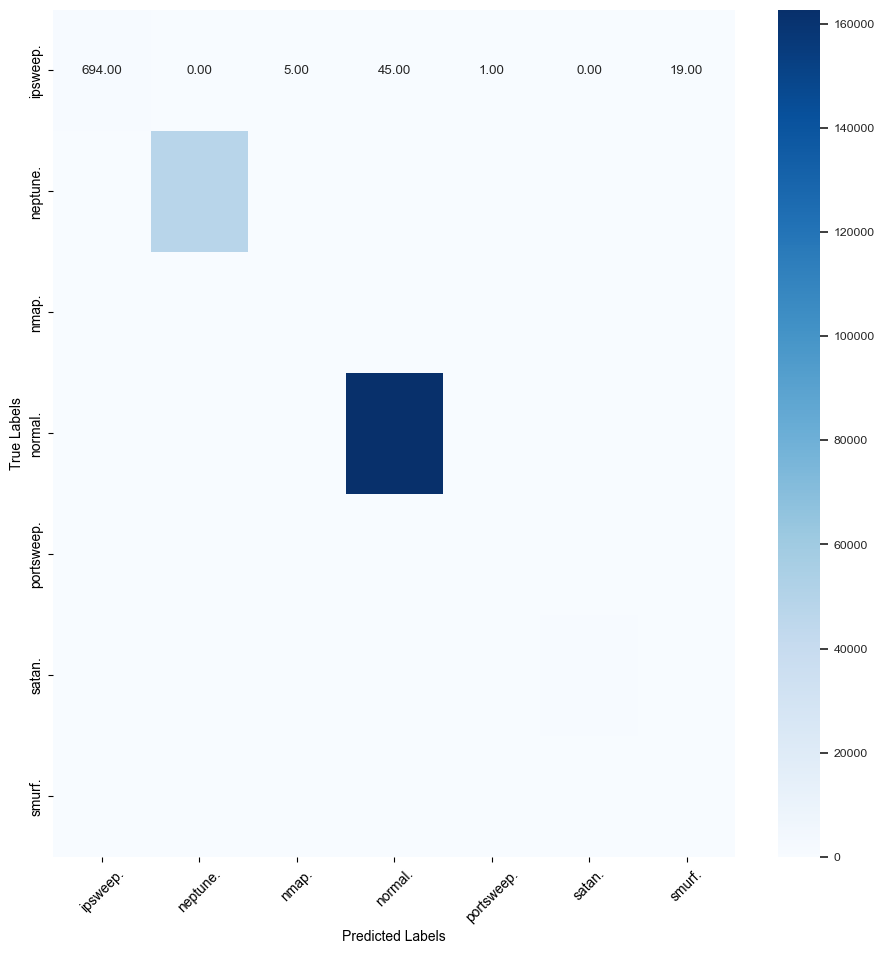

Accuracy:  [0.99940756 0.99981807 0.99961281 0.99815736 0.99962214 0.99951018
 0.99955217]
Precision:  [0.9241012  0.99942    0.92831541 0.99836124 0.95744681 0.96844396
 0.93873874]
Recall:  [0.90837696 0.99977206 0.80434783 0.99921371 0.92240117 0.92132505
 0.89365352]
Specificity:  [0.99973315 0.99983143 0.99990656 0.99482327 0.99986896 0.9998641
 0.99984096]
F1 Score:  [0.91617162 0.999596   0.86189684 0.99878729 0.93959732 0.94429708
 0.91564148]
False Alarm Rate also known as False Positive Rate:  [2.66851434e-04 1.68566045e-04 9.34387322e-05 5.17672606e-03
 1.31035225e-04 1.35895033e-04 1.59039774e-04]
Efficiency:  [3404.05501975 5931.04064675 8608.29130435  193.02039445 7039.3374817
 6779.68158778 5619.05675512]


,accuracy,precision,recall,specificity,f1_score,FAR,efficiency
ipsweep.,0.999408,0.924101,0.908377,0.999733,0.916172,0.000267,3404.055020
neptune.,0.999818,0.999420,0.999772,0.999831,0.999596,0.000169,5931.040647
nmap.,0.999613,0.928315,0.804348,0.999907,0.861897,0.000093,8608.291304
normal.,0.998157,0.998361,0.999214,0.994823,0.998787,0.005177,193.020394
portsweep.,0.999622,0.957447,0.922401,0.999869,0.939597,0.000131,7039.337482
satan.,0.999510,0.968444,0.921325,0.999864,0.944297,0.000136,6779.681588
smurf.,0.999552,0.938739,0.893654,0.999841,0.915641,0.000159,5619.056755


In [35]:
accuracy, precision, recall, specificity, fscore, FAR, efficiency, report_df = result(model, X_test, y_test, b, attacks)
report_df

In [36]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

6699/6699 [==============================] - 30s 4ms/step - loss: 0.0082 - accuracy: 0.9978
0.997840166091919
